# Heart Attack Predictions and Explortatory Data Analysis

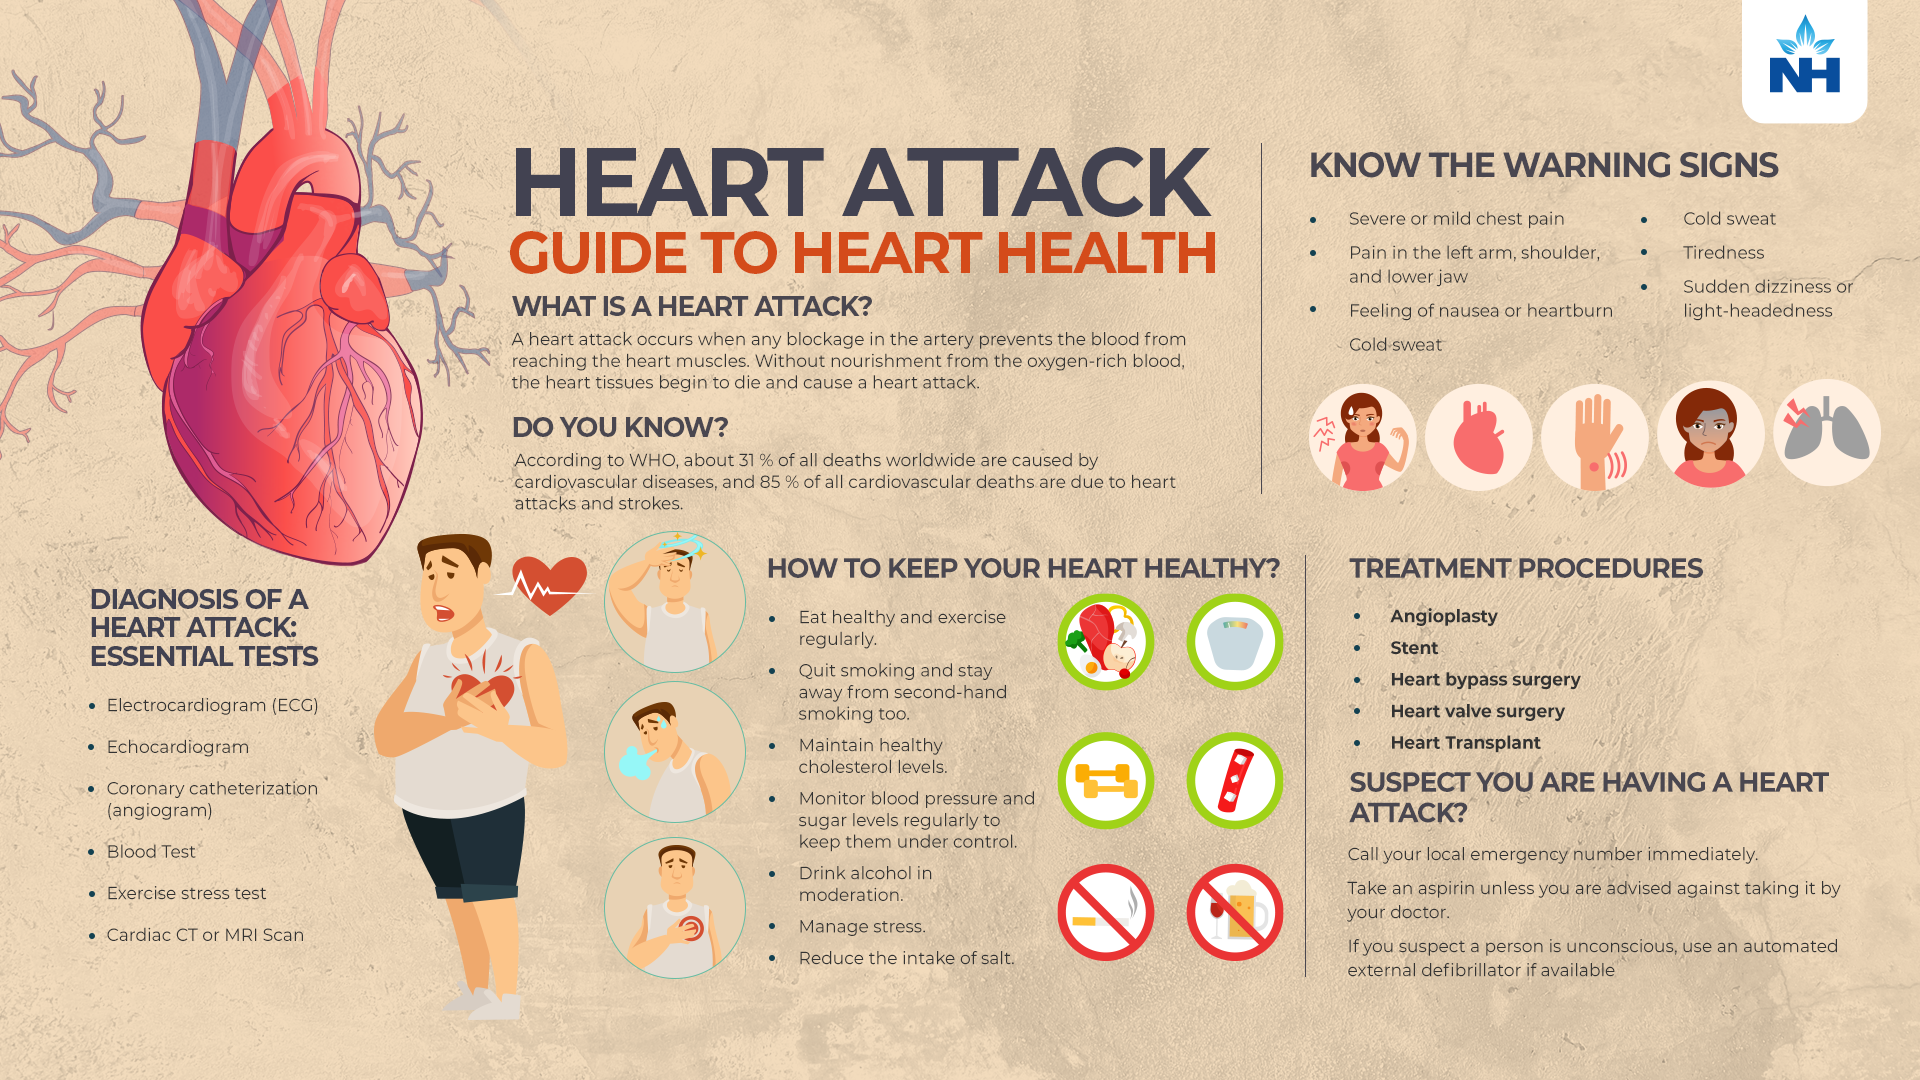

#### Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [3]:
data = pd.read_csv('/Users/manueldona/Downloads/archive/heart.csv')
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
# check attributes format and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# how many heart attacks do we have?
percent = data.output.mean()
print ("Percentage of heart attacks: {:,.2f}%".format(percent))

Percentage of heart attacks: 0.54%


In [6]:
# Conditional distribution of chest pain on heart attack 
exng_heart = data.groupby('restecg')['output'].mean()
exng_heart

restecg
0    0.462585
1    0.631579
2    0.250000
Name: output, dtype: float64

In [7]:
# Check null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Fortunately we do not have null values

## Exploratory data analysis

Let's check the distribution of the categorical variables

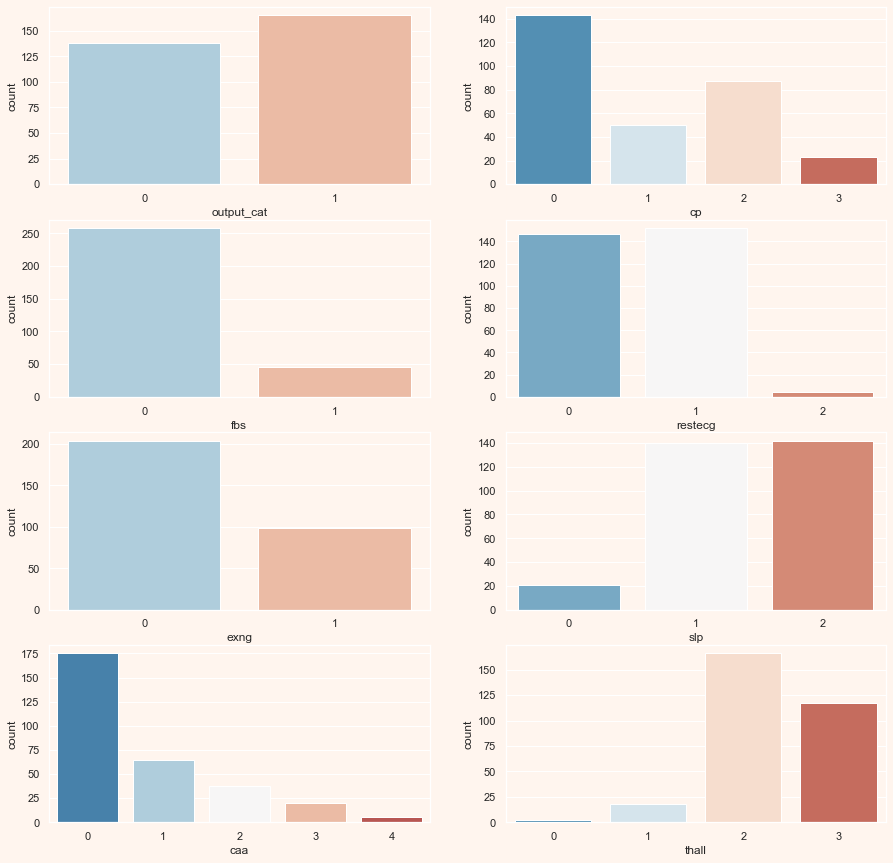

In [8]:
# categorical variables
data['output_cat'] = data['output'].astype('category')
data['slp_cat'] = data['slp'].astype('category')
data['restecg'] = data['restecg'].astype('category')
data['thall'] = data['thall'].astype('category')

background_color = "seashell"
fig, axes = plt.subplots(4, 2, figsize = (15, 15))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()
fig.patch.set_facecolor(background_color) 

ax1 = sns.countplot(data=data, x="output_cat", palette = 'RdBu_r', ax=ax1)
ax1.set_facecolor(background_color) 

ax2 = sns.countplot(data=data, x="cp", palette = 'RdBu_r', ax=ax2)
ax2.set_facecolor(background_color)

ax3 = sns.countplot(data=data, x="fbs", palette = 'RdBu_r', ax=ax3)
ax3.set_facecolor(background_color)

ax4 = sns.countplot(data=data, x="restecg", palette = 'RdBu_r', ax=ax4)
ax4.set_facecolor(background_color)

ax5 = sns.countplot(data=data, x="exng", palette = 'RdBu_r', ax=ax5)
ax5.set_facecolor(background_color)

ax6 = sns.countplot(data=data, x="slp", palette = 'RdBu_r', ax=ax6)
ax6.set_facecolor(background_color)

ax7 = sns.countplot(data=data, x="caa", palette = 'RdBu_r', ax=ax7)
ax7.set_facecolor(background_color)

ax8 = sns.countplot(data=data, x="thall", palette = 'RdBu_r', ax=ax8)
ax8.set_facecolor(background_color)

plt.show()

The target variable is balanced

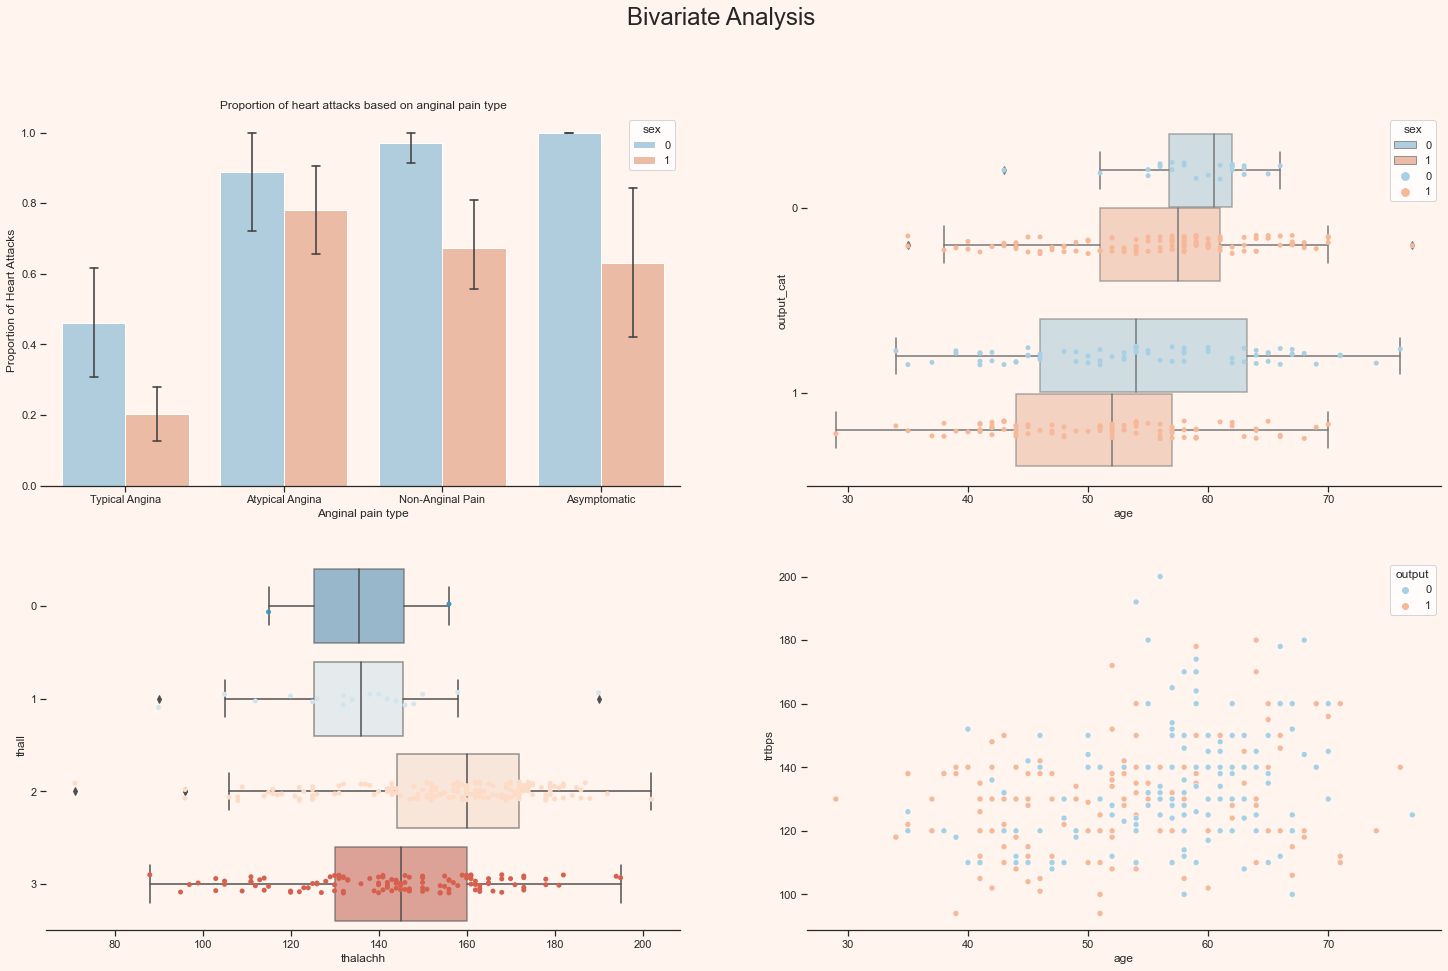

In [9]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
background_color = "seashell"
fig, axes = plt.subplots(2, 2, figsize = (25, 15))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.patch.set_facecolor(background_color) 

ax1 = sns.barplot(data=data, x="cp", y="output", ax=ax1, palette = 'RdBu_r', hue='sex', capsize=.05, errwidth=1.6)
ax1.set(xlabel = 'Anginal pain type', ylabel='Proportion of Heart Attacks', title = 'Proportion of heart attacks based on anginal pain type')
ax1.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
ax1.set_facecolor(background_color) 

ax2 = sns.stripplot(data=data, y='output_cat', x='age', hue='sex', jitter=True, ax=ax2, palette='RdBu_r', dodge=True)
ax2 = sns.boxplot(data=data, y='output_cat', x='age', hue='sex', ax=ax2, palette='RdBu_r', boxprops={'alpha': 0.6})
ax2.set_facecolor(background_color) 

ax3 = sns.stripplot(data=data, y='thall', x='thalachh', jitter=True, ax=ax3, palette='RdBu_r', dodge=True)
ax3 = sns.boxplot(data=data, y='thall', x='thalachh', ax=ax3, palette='RdBu_r', boxprops={'alpha': 0.6})
ax3.set_facecolor(background_color) 

ax4 = sns.scatterplot(data=data, x='age', y='trtbps', ax=ax4, palette='RdBu_r', hue='output')
ax4.set_facecolor(background_color) 


plt.suptitle('Bivariate Analysis', size=24)

plt.show()

Let's check the distribution of the continous variables conditioning on the output class

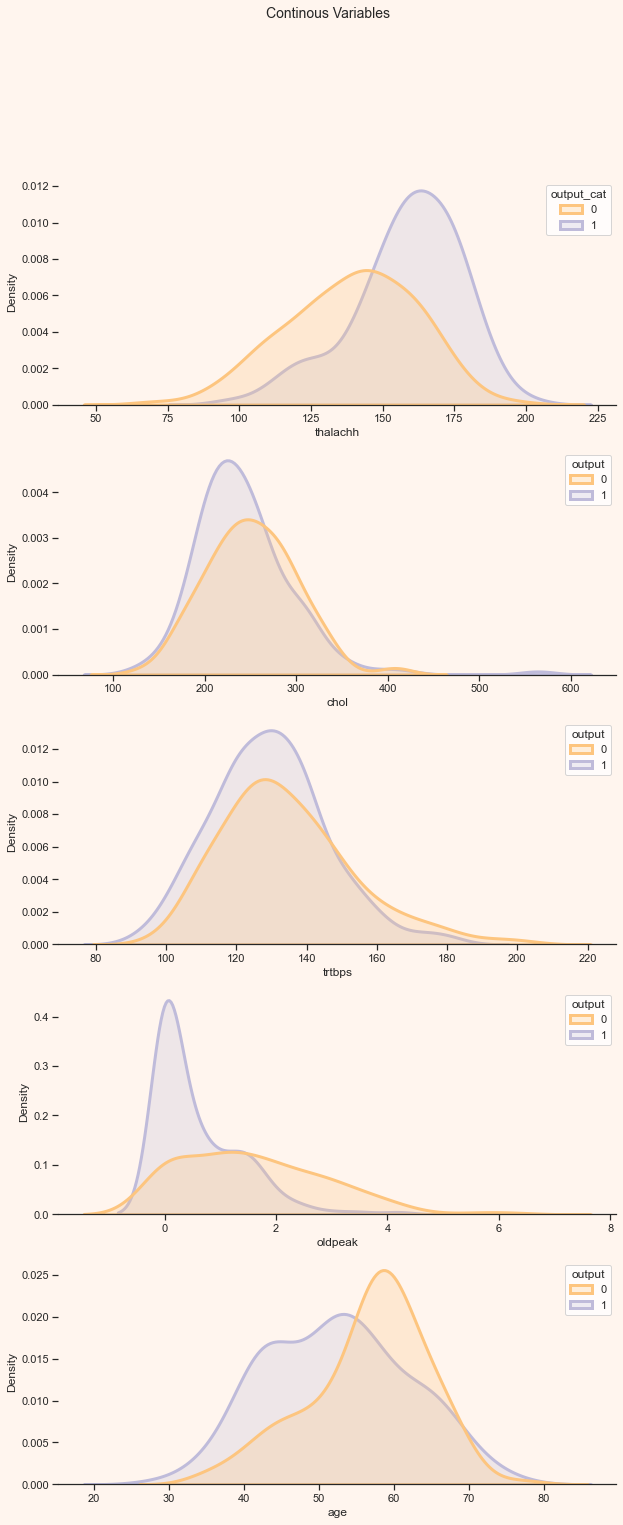

In [8]:
# QUANTITATIVE VARIABLES and OUTPUT

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params)
background_color = "seashell"


fig, axes = plt.subplots(5, 1, figsize = (10, 24))
ax1, ax2, ax3, ax4, ax5 = axes.flatten()
fig.patch.set_facecolor(background_color) 

ax1 = sns.kdeplot(data=data, x='thalachh', hue='output_cat',fill=True, ax=ax1, palette='PuOr',
                 linewidth=3)
ax1.set_facecolor(background_color) 

ax2 = sns.kdeplot(data=data, x='chol', hue='output', ax=ax2, fill=True, palette='PuOr', linewidth=3)
ax2.set_facecolor(background_color) 

ax3 = sns.kdeplot(data=data, x='trtbps', hue='output', ax=ax3, fill=True, palette='PuOr', linewidth=3)
ax3.set_facecolor(background_color)

ax4 = sns.kdeplot(data=data, x='oldpeak', hue='output', fill=True, ax=ax4, palette='PuOr', linewidth=3)
ax4.set_facecolor(background_color)

ax5 = sns.kdeplot(data=data, x='age', hue='output', fill=True, ax=ax5, palette='PuOr', linewidth=3)
ax5.set_facecolor(background_color)

plt.suptitle('Continous Variables', size=14)

plt.show()

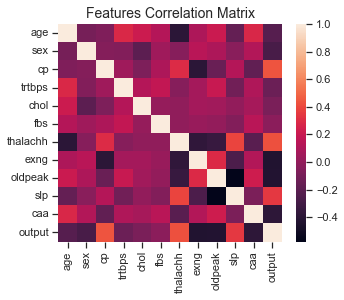

In [9]:
plt.subplots(figsize = (5, 4))
sns.heatmap(data.corr())
plt.title('Features Correlation Matrix', fontsize=14)
plt.show()

###### Data pre-processing
I created dummies for each categorical variable

In [10]:
df = data.loc[:, 'age':'output']
cat_cols = ['sex', 'cp', 'fbs', 'caa', 'restecg', 'exng', 'thall', 'slp']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

df1 = pd.get_dummies(df, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1['output']

###### Data splitting

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print("The shape of X_train is  ", X_train.shape)
print("The shape of X_test is   ",X_test.shape)
print("The shape of y_train is  ",y_train.shape)
print("The shape of y_test is   ",y_test.shape)

The shape of X_train is   (227, 22)
The shape of X_test is    (76, 22)
The shape of y_train is   (227,)
The shape of y_test is    (76,)


### Machine learning 

##### k-nearest neighbors

The pipeline creates step 


In [12]:
# KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

knn_mod = KNeighborsClassifier()

knn = Pipeline([("scaler", MinMaxScaler()), ("knn", knn_mod)])

knn.fit(X_train, y_train)

print('Accuracy of knn is: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of knn is: 0.842


In [69]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([("scaler", MinMaxScaler()), ("knn", knn_mod)])

# grid search optimal parameters with 5 folds cross validation
param_grid = {'knn__n_neighbors': [i for i in range(1,21)],
              'knn__weights': ['uniform', 'distance'],
              'knn__metric': ['euclidean', 'hamming', 'manhattan']}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True) 
grid.fit(X_train, y_train)

test_scores = grid.cv_results_['mean_test_score']
train_scores = grid.cv_results_['mean_train_score'] 

print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_)) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.819
Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 12, 'knn__weights': 'uniform'}


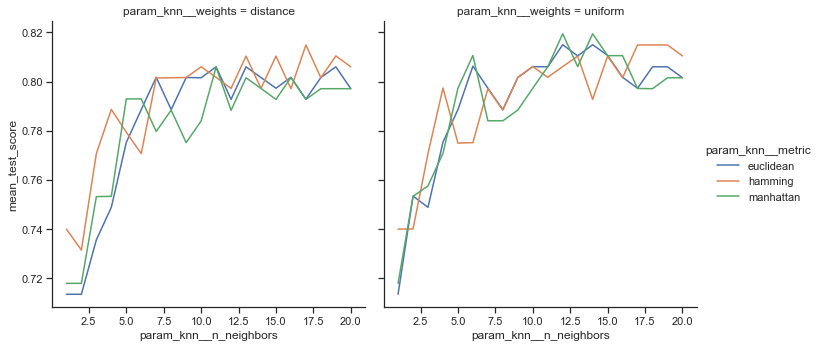

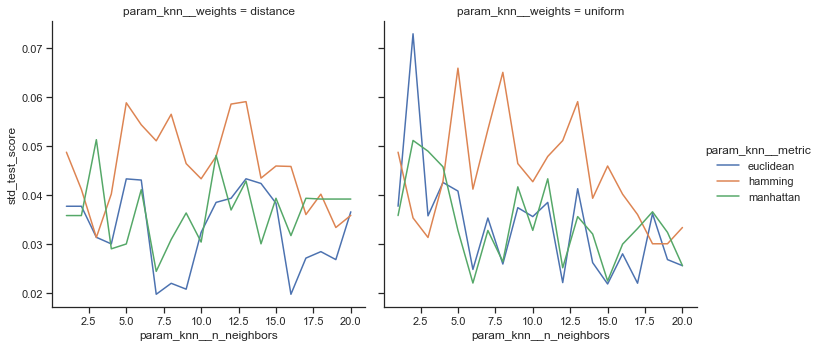

In [14]:
df = pd.DataFrame(grid.cv_results_)
df2 = df.groupby(['param_knn__metric', 'param_knn__weights', 'param_knn__n_neighbors'])[['mean_test_score', 'std_test_score']].mean().reset_index()

ax1=sns.relplot(data=df2, x='param_knn__n_neighbors', y='mean_test_score', hue='param_knn__metric', col='param_knn__weights', kind='line')
ax2=sns.relplot(data=df2, x='param_knn__n_neighbors', y='std_test_score', hue='param_knn__metric', col='param_knn__weights', kind='line')

plt.show()

#### Final knn model

In [15]:
knn_mod = KNeighborsClassifier(n_neighbors=grid.best_params_['knn__n_neighbors'], 
                               weights=grid.best_params_['knn__weights'],
                               metric=grid.best_params_['knn__metric'])
knn = Pipeline([("scaler", MinMaxScaler()), ("knn", knn_mod)])

knn.fit(X_train, y_train)

print("Test set score: {:.3f}".format(knn.score(X_test, y_test))) 

Test set score: 0.855


In [22]:
# Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('scaler', MinMaxScaler()), ('logreg', LogisticRegression())])
logreg.fit(X_train, y_train)

print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

# predicted probabilities
log_prob = logreg.predict_proba(X_test)[:,1]

Training set score: 0.872
Test set score: 0.868


In [30]:
# First, fit a decision tree without parameters
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 12)
clf.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(clf.score(X_test, y_test)))

# from the training accuracy we can see that the model is overfitted
print('Total number of nodes: {}'.format(clf.tree_.node_count))

Accuracy on training set: 1.000
Accuracy on test set: 0.737
Total number of nodes: 89


In [31]:
# cost complexity pruning, choosing the optimal level of alpha
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

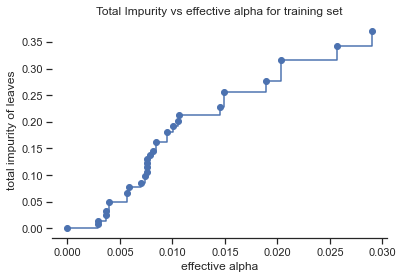

In [32]:
# alphas vs impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [33]:
# then we train a decision tree using the effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12472900561584255


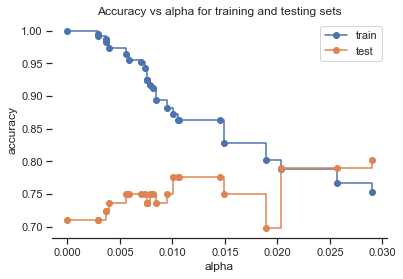

In [34]:
train_score = [clf.score(X_train, y_train) for clf in clfs]
test_score = [clf.score(X_test, y_test) for clf in clfs]

# let's create a dataframe with train_score, test_score and ccp_alphas
dict = {'train_score': train_score, 'test_score': test_score, 'ccp_alphas': ccp_alphas} 
df = pd.DataFrame(dict)

#plot accuracy vs alphas
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
# choose alpha that maximise test accuracy 
optimal_alpha = df['ccp_alphas'][df['test_score'] == max(df['test_score'])]

print('the optimal level of alpha is {:.3f} with an accuracy of {:.3f}'.format(float(optimal_alpha), max(test_score)))

the optimal level of alpha is 0.029 with an accuracy of 0.803


In [36]:
# final tree
clf_final = DecisionTreeClassifier(random_state = 12, ccp_alpha = float(optimal_alpha))
clf_final.fit(X_train, y_train)

print('Accuracy on test set: {:.3f}'.format(clf_final.score(X_test, y_test)))
print('Total number of nodes: {}'.format(clf_final.tree_.node_count))

Accuracy on test set: 0.803
Total number of nodes: 3


[Text(465.0, 679.5, 'thall_2 <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = u'),
 Text(232.5, 226.5, 'gini = 0.392\nsamples = 101\nvalue = [74, 27]\nclass = o'),
 Text(697.5, 226.5, 'gini = 0.354\nsamples = 126\nvalue = [29, 97]\nclass = u')]

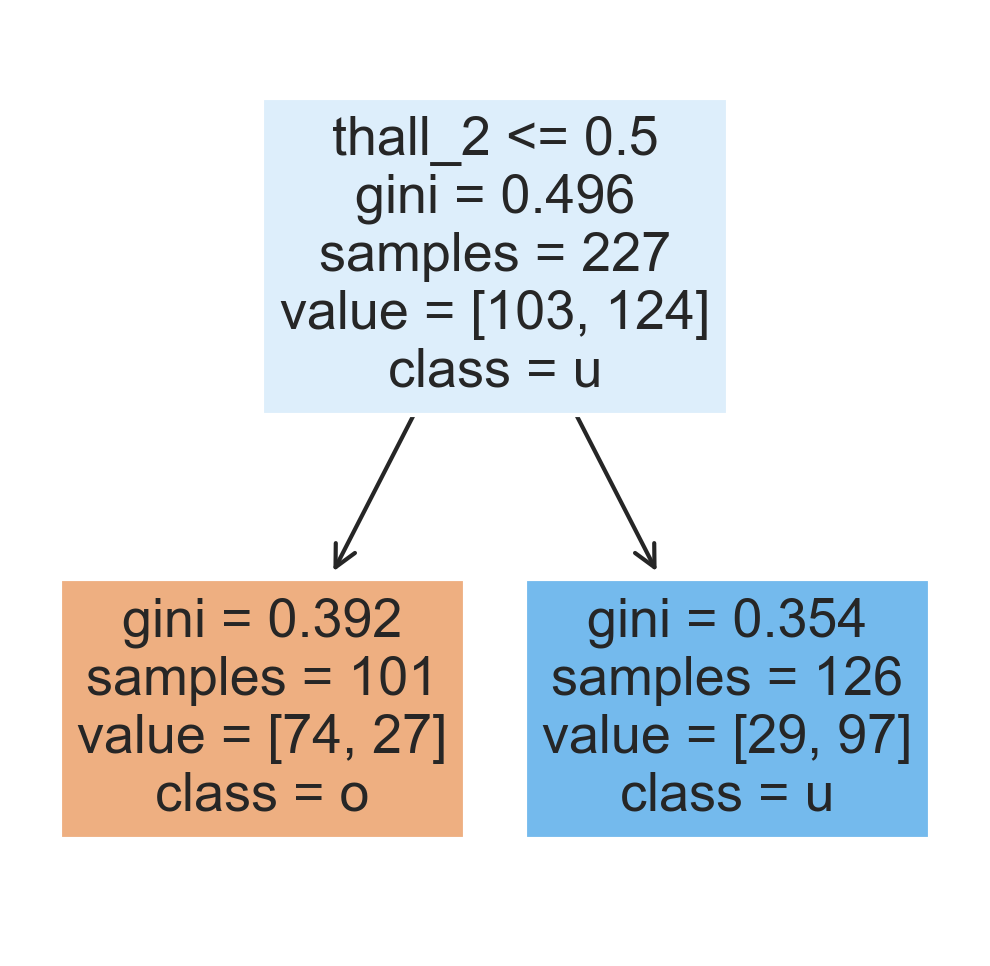

In [37]:
fn= list(X.columns)
cn='output'

from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_final, filled=True, feature_names = fn, class_names=cn)

In [23]:
# Support Vector Machines
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1['output']

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print('The accuracy of the default model is: {:.3f}'.format(pipe.score(X_test, y_test)))

The accuracy of the default model is: 0.842


In [24]:
# create pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

# grid search optimal parameters with 5 folds cross validation
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__kernel': ['rbf', 'linear', 'poly']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5) 
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_)) 
print("Train set score: {:.3f}".format(grid.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.850
Train set score: 0.885
Test set score: 0.855
Best parameters: {'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}


In [25]:
svm = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C = grid.best_params_['svm__C'], 
                                                        gamma = grid.best_params_['svm__gamma'], 
                                                        kernel = grid.best_params_['svm__kernel'],
                                                        probability=True))])
svm.fit(X_train, y_train)
print("Accuracy of svm: {:.3f}".format(svm.score(X_test, y_test))) 

# probabilities
svm_prob = svm.predict_proba(X_test)[:,1]

Accuracy of svm: 0.855


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# model
forest_mod = RandomForestClassifier(random_state=12, max_features='sqrt')

forest_mod.fit(X_train, y_train)

forest_acc = forest_mod.score(X_test, y_test)

print("Accuracy on training set: {:.3f}".format(forest_mod.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest_acc))

Accuracy on training set: 1.000
Accuracy on test set: 0.842


In [59]:
# Random forest tuning
parameters = {'n_estimators':[i for i in range(100,700, 100)],
              'min_samples_split':[2,3,4,5,6]}

grid_for = GridSearchCV(forest_mod, param_grid=parameters, cv=5)
grid_for.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.3f}".format(grid_for.best_score_)) 
print("Best parameters: {}".format(grid_for.best_params_))

Best cross-validation accuracy: 0.810
Best parameters: {'min_samples_split': 5, 'n_estimators': 100}


In [60]:
# rf tuned model
rf = RandomForestClassifier(random_state=12, max_features='sqrt', n_estimators=grid_for.best_params_['n_estimators'], 
                                   min_samples_split=grid_for.best_params_['min_samples_split'])

rf.fit(X_train, y_train)

print("Accuracy of Random Forest: {:.3f}".format(rf.score(X_test, y_test))) 

# probabilities
rf_prob = rf.predict_proba(X_test)[:,1]

Accuracy of Random Forest: 0.855


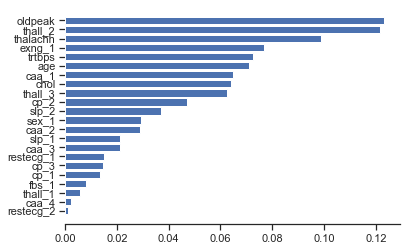

In [39]:
# variance importance plot
importances = forest_mod.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [49]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# model
gbrt_base = Pipeline([("scaler", MinMaxScaler()), ("gbrt", GradientBoostingClassifier(random_state=16))])
gbrt_base.fit(X_train, y_train)
gbrt_base_acc = gbrt_base.score(X_test, y_test)
print('The accuracy of the default model is: {:.3f}'.format(gbrt_base_acc))

The accuracy of the default model is: 0.750


In [55]:
# Hyperparameter tuning
param_grid = {'gbrt__learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
              'gbrt__max_depth': [1, 2, 3, 5, 10, 100],
              'gbrt__n_estimators': [300, 400, 500, 600, 700, 800]}

grid = GridSearchCV(gbrt_base, param_grid=param_grid, cv=5) 
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_)) 
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.810
Test set score: 0.842
Best parameters: {'gbrt__learning_rate': 0.01, 'gbrt__max_depth': 1, 'gbrt__n_estimators': 800}


In [67]:
from sklearn.metrics import classification_report
# Gradient boosting final model
gbrt = Pipeline([("scaler", MinMaxScaler()), 
                 ("gbrt", GradientBoostingClassifier(learning_rate = grid.best_params_['gbrt__learning_rate'],
                                                     max_depth = grid.best_params_['gbrt__max_depth'],
                                                     n_estimators = grid.best_params_['gbrt__n_estimators']))])

gbrt.fit(X_train, y_train)
gbrt_acc = gbrt.score(X_test, y_test)
print('The accuracy of the tuned model is: {:.3f}'.format(gbrt_acc))
print('Improvement of {:0.2f}%.'.format( 100 * (gbrt_acc - gbrt_base_acc) / gbrt_base_acc))

# predicted probabilities
gbrt_prob = gbrt.predict_proba(X_test)[:,1]
gbrt_pred = gbrt.predict(X_test)

print(classification_report(y_test, gbrt_pred))

The accuracy of the tuned model is: 0.842
Improvement of 12.28%.
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [38]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada = Pipeline([("scaler", MinMaxScaler()), ("ada", AdaBoostClassifier(
                                             base_estimator = DecisionTreeClassifier(),
                                             algorithm="SAMME.R", random_state=10))])
ada.fit(X_train, y_train)
ada_acc_base = ada.score(X_test, y_test)
print('Accuracy of Adaboost: {:.3f}'.format(ada_acc_base))

Accuracy of Adaboost: 0.697


In [39]:
# tuning adaboost
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
grid_par = {
        'base_estimator__max_depth':[1, 2, 3, 5, 10, 100],
        'learning_rate':[0.001, 0.01, 0.1, 0.5, 1, 2],
        'n_estimators':[100, 200, 300, 400, 500, 600]}

grid_ada = GridSearchCV(ada, param_grid=grid_par, cv=5) 
grid_ada.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.3f}".format(grid_ada.best_score_)) 
print("Test set score: {:.3f}".format(grid_ada.score(X_test, y_test))) 
print("Best parameters: {}".format(grid_ada.best_params_))

Best cross-validation accuracy: 0.811
Test set score: 0.816
Best parameters: {'base_estimator__max_depth': 5, 'learning_rate': 2, 'n_estimators': 300}


In [42]:
# Adaboost final model
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=grid_ada.best_params_['base_estimator__max_depth']), 
                             n_estimators=grid_ada.best_params_['n_estimators'],
                             algorithm="SAMME.R", learning_rate=grid_ada.best_params_['learning_rate'],
                             random_state=10)

ada_tuned = Pipeline([("scaler", MinMaxScaler()), ("ada", ada)])

ada_tuned.fit(X_train, y_train)

ada_tuned_acc = ada_tuned.score(X_test, y_test)
print('The accuracy of the tuned model is: {:.3f}'.format(ada_tuned_acc))
print('Improvement of {:0.2f}%.'.format( 100 * (ada_tuned_acc - ada_acc_base) / ada_acc_base))

# predicted probabilities
ada_prob = ada.predict_proba(X_test)[:,1]

The accuracy of the tuned model is: 0.803
Improvement of 15.09%.


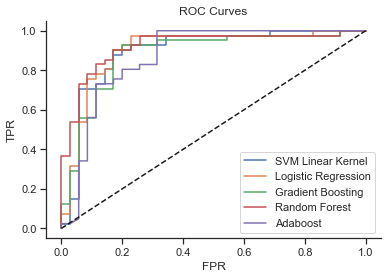

In [61]:
# Model comparison and roc curves
from sklearn.metrics import roc_curve

fpr_svm, tpr_svm, thresholds = roc_curve(y_test, svm_prob)
fpr_log, tpr_log, thresholds = roc_curve(y_test, log_prob)
fpr_boost, tpr_boost, thresholds = roc_curve(y_test, gbrt_prob)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rf_prob)
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, ada_prob)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
background_color = "seashell"
fig.patch.set_facecolor(background_color) 
plt.plot(fpr_svm, tpr_svm, label='SVM Linear Kernel')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_boost, tpr_boost, label='Gradient Boosting')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_ada, tpr_ada, label='Adaboost')
plt.plot([0,1],[0,1],"k--")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.title("ROC Curves")
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf_prob) 
log_auc = roc_auc_score(y_test, log_prob) 
svm_auc = roc_auc_score(y_test, svm_prob)
boost_auc = roc_auc_score(y_test, gbrt_prob)
ada_auc = roc_auc_score(y_test, ada_prob)

aucs = {'rf': rf_auc, 'log': log_auc, 'svm':svm_auc, 'boost':boost_auc, 'ada':ada_auc}

max_auc = 0
for auc in aucs:
    if aucs[auc] > max_auc:
        max_auc = aucs[auc]
        model = auc
print('The best model is {} with AUC of {}'.format(model, max_auc))

The best model is rf with AUC of 0.921951219512195


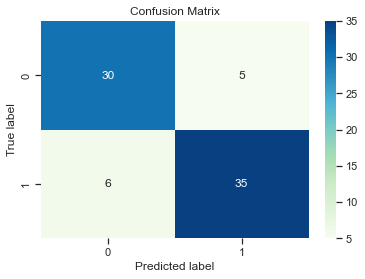

In [71]:
# confusion matrix
from sklearn.metrics import confusion_matrix
rf_pred = rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(cf_matrix,annot=True,fmt='d', cmap="GnBu")
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()